In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
zip = ZipFile('/content/drive/MyDrive/Tech_seminar/Gender2.zip')
zip.extractall()

In [2]:
from zipfile import ZipFile
zip = ZipFile('/content/drive/MyDrive/Tech_seminar/Data.zip')
zip.extractall()

In [3]:
import cv2
import subprocess
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.datasets import mnist

In [8]:
import cv2
import subprocess
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [5]:
w, h = 128, 128
c = 3
batch_size = 4
no_epochs = 1000
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0
number_of_visualizations = 6
input_shape = (w, h, c)

In [6]:
import os
def load_dataset():
  X = list()
  Y = list()
  # for folder in os.listdir('/content/Gender/Men'):
  for filename in os.listdir('/content/Data/Train/Cat'):
    img = cv2.imread('/content/Data/Train/Cat/' + filename, cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_img = cv2.resize(RGB_img, (w, h), cv2.INTER_AREA)
    X.append(RGB_img)
    Y.append('0')
  for filename in os.listdir('/content/Data/Train/Dog'):
    img = cv2.imread('/content/Data/Train/Dog/' + filename, cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_img = cv2.resize(RGB_img, (w, h), cv2.INTER_AREA)
    X.append(RGB_img)
    Y.append('1')
  X = np.array(X)
  Y = np.array(Y)
  X = X.astype('float32') / 255.0
  Y = keras.utils.to_categorical(Y, 2)
  trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
  return trainX, trainY, testX, testY

In [7]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, w, h)
else:
    input_shape = (w, h, 3)

In [51]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001,l2=0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
activation_20 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_21 (Activation)   (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)       

In [53]:
# from keras.utils import to_categorical
trainX, trainY, testX, testY = load_dataset()


[0. 1.]


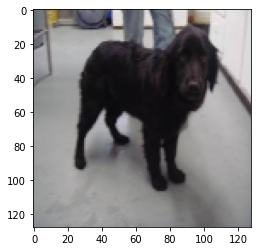

In [54]:
import matplotlib.pyplot as plt
print(testY[49])
img1 = (testX[49] * 255).astype(np.uint8)
img1 = img1.reshape(128, 128,3)
plt.imshow(img1)

In [55]:
len(trainX)

1600

In [57]:
opt = keras.optimizers.Adam(learning_rate=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# model.compile(
#     optimizer=opt,
#   loss='binary_crossentropy',
#   metrics=['accuracy'])
early_stopping = EarlyStopping(patience=10, verbose=1)
model_checkpoint = ModelCheckpoint("l1_l2_wo_dropout.model", verbose=1 , save_best_only=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)

In [58]:
history = model.fit(trainX, trainY, shuffle=True, epochs=no_epochs, batch_size=16, validation_split = validation_split, callbacks=[model_checkpoint, early_stopping, reduce_lr], verbose=1)
# model.save('l1_wo_dropout.model')

Epoch 1/1000
80/80 [==============================] - 25s 295ms/step - loss: 0.7856 - accuracy: 0.5183 - val_loss: 0.7252 - val_accuracy: 0.6594

Epoch 00001: val_loss improved from inf to 0.72516, saving model to l1_l2_wo_dropout.model
INFO:tensorflow:Assets written to: l1_l2_wo_dropout.model/assets
Epoch 2/1000
80/80 [==============================] - 23s 289ms/step - loss: 0.7145 - accuracy: 0.5837 - val_loss: 0.7023 - val_accuracy: 0.5656

Epoch 00002: val_loss improved from 0.72516 to 0.70235, saving model to l1_l2_wo_dropout.model
INFO:tensorflow:Assets written to: l1_l2_wo_dropout.model/assets
Epoch 3/1000
80/80 [==============================] - 23s 290ms/step - loss: 0.6589 - accuracy: 0.6600 - val_loss: 0.6236 - val_accuracy: 0.7250

Epoch 00003: val_loss improved from 0.70235 to 0.62364, saving model to l1_l2_wo_dropout.model
INFO:tensorflow:Assets written to: l1_l2_wo_dropout.model/assets
Epoch 4/1000
80/80 [==============================] - 23s 290ms/step - loss: 0.6003 - 

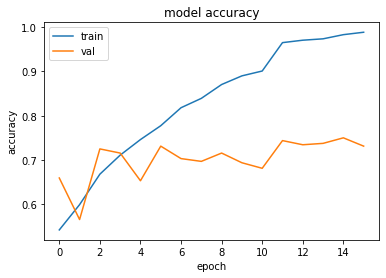

In [59]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

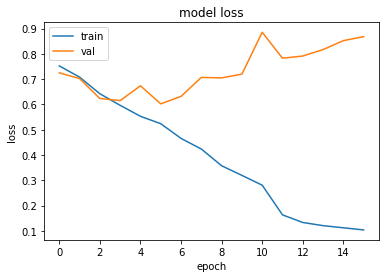

In [60]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [61]:
model1 = keras.models.load_model('/content/l1_l2_wo_dropout.model')

In [62]:
predicted_score = model1.predict(testX)
score = model1.evaluate(testX, testY)
print("test loss, test acc:", score)

13/13 [==============================] - 2s 126ms/step - loss: 0.7024 - accuracy: 0.6650
test loss, test acc: [0.7024223208427429, 0.6650000214576721]


[[0.79019344 0.2133387 ]]
[1. 0.]


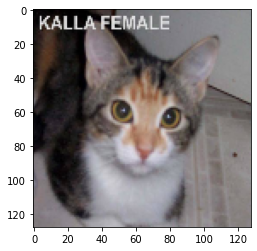

In [68]:
n = 23
img1 = (testX[n] * 255).astype(np.uint8)
img1 = img1.reshape(128, 128 ,3)
plt.imshow(img1)
# img = np.expand_dims(trainx[1], axis=0)
# img = img.astype('float32')
# img = testx[0].reshape(1,testx[0].shape)
img = testX[n].reshape(1, 128, 128, 3)
x = model1.predict(img)
print(x)
print(testY[n])